# Régression Logistique avec Python


### Les données traitées dans ce TP décrivent des individus ayant des revenus >50K ou <50K. Le but est d’utiliser les variables explicatives de ces données afin de prédire la variable expliquée binaire (le label) qui est le revenu de chaque personne.

In [61]:
# Importer les libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Importer le dataset

dataset = pd.read_csv('census_income.csv')

In [3]:
#dimensions : nombre de lignes, nombre de colonnes
dataset.shape

(48842, 15)

In [4]:
#Visualiser les 5 premieres lignes
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [79]:
dataset['income_level'] = pd.factorize(dataset['income_level'])[0]
dataset['workclass'] = pd.factorize(dataset['workclass'])[0]
dataset['education'] = pd.factorize(dataset['education'])[0]
dataset['marital_status'] = pd.factorize(dataset['marital_status'])[0]
dataset['occupation'] = pd.factorize(dataset['marital_status'])[0]
dataset['relationship'] = pd.factorize(dataset['relationship'])[0]
dataset['native_country'] = pd.factorize(dataset['native_country'])[0]
dataset['race'] = pd.factorize(dataset['race'])[0]
dataset['sex'] = pd.factorize(dataset['sex'])[0]

In [85]:
#Modalités de la variable à expliquer
print(dataset['income_level'].unique())


[0 1]


In [86]:
#Nombre d'observations par Modalité de la variable à expliquer
print(dataset.groupby('income_level').size())


income_level
0    37155
1    11687
dtype: int64


C:\Users\eyanasri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


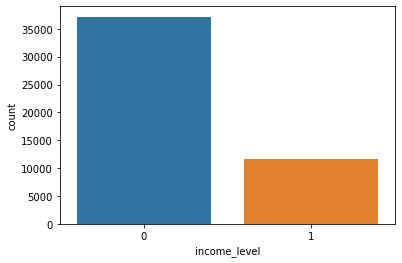

In [87]:
sn.countplot(dataset['income_level'],label="Count")
plt.show()

In [97]:
# diviser les données en attributs et étiquettes (labes)

X = dataset.iloc[:,9:14].values

y= dataset.iloc[:,-1].values

In [98]:
# Splitting du dataset Training set and Test set (80%,20%)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20)


#Over-sampling using SMOTE (Si besoin)

In [99]:
# Feature Scaling / Mise en echelle: Normalisation & Standardisation
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Normalisation
#minmaxscaler=MinMaxScaler()
#X_train_n=minmaxscaler.fit_transform(X_train)
#X_test_n=minmaxscaler.fit_transform(X_test)

#Standardisation
standarscaler= StandardScaler()
X_train=standarscaler.fit_transform(X_train)
X_test=standarscaler.fit_transform(X_test)


In [100]:
#Instanciation du modèle
modele_regLog = LogisticRegression(penalty='none')
# Apprentissage 
modele_regLog.fit(X_train, y_train)
#Prédiction
y_pred=modele_regLog.predict(X_test)


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

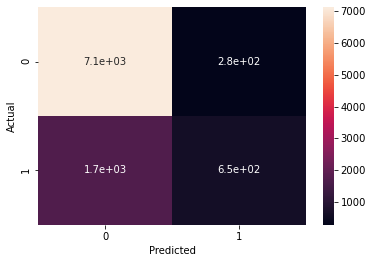

In [101]:
#Evaluation des performances
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7404
           1       0.70      0.28      0.39      2365

    accuracy                           0.80      9769
   macro avg       0.75      0.62      0.64      9769
weighted avg       0.78      0.80      0.76      9769



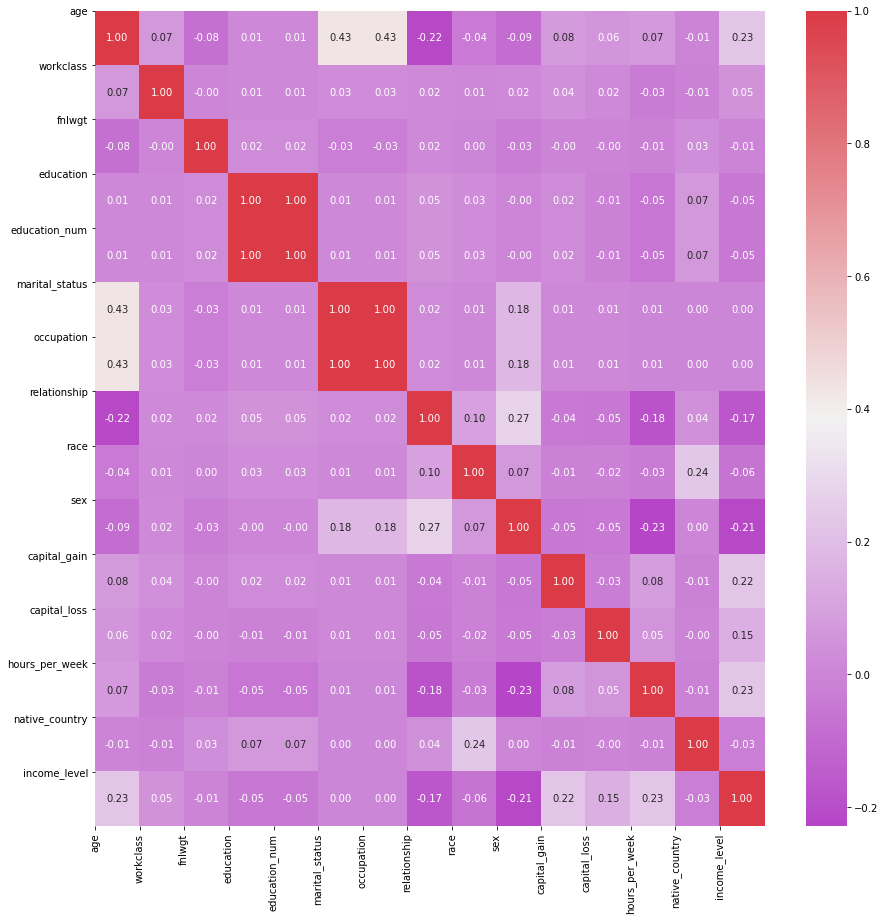

In [94]:
#Create Correlation matrix
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(15,15))
#Generate Color Map
colormap = sn.diverging_palette(300, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sn.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [103]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.512066
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                39073
Model:                          Logit   Df Residuals:                    39068
Method:                           MLE   Df Model:                            4
Date:                Tue, 10 May 2022   Pseudo R-squ.:                 0.06802
Time:                        18:01:31   Log-Likelihood:                -20008.
converged:                       True   LL-Null:                       -21468.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3802      0.014    -27.919      0.000      -0.407      -0.354
x2             7.3217      0.